In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
x = np.linspace(0,20)
y=--x+2


dict={'x0':1,'x1':x , 'y':y}

df=pd.DataFrame(dict)
df = df.sample(frac=1)


col=df.shape[1]
x=np.matrix(df.iloc[:,0:col-1])
y=np.matrix(df.iloc[:,col-1:col])


theta=np.matrix([0.000001,0.000001])
theta

matrix([[1.e-06, 1.e-06]])

In [3]:
np.matrix(np.zeros(5))

matrix([[0., 0., 0., 0., 0.]])

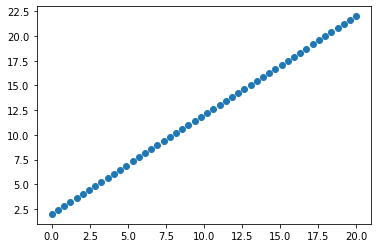

In [4]:
plt.scatter(df.x1,df.y)

In [5]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse

In [6]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(Theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(x) * np.sum(t)
    grad=temp
    return grad

In [7]:
def Adagrad(x,y,v,theta):
    
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        return v

    v.append (v[-1] + np.power(gradient(x,y,theta),2))
    return v[-1]

In [77]:
def Batch_Adagrad_GD(X,Y,Theta,lr,iteration):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = []                   
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    vt=[]
    eps=0.0000000000001
    for i in range(iteration):
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
     
        cost.append( GDCostFunction(X,Y,Theta) )

        vt.append(Adagrad(X,Y,v,Theta))
        vt_sqrt=np.sqrt(vt[-1])
        grad=gradient(X,Y,Theta)
        if i > 1:
            if np.abs(cost[i-1] - cost[i]) < 0.001:
                  break
#         for j in range(theta_parameters):
        
#             temp[:,j] = Theta[:,j] - (( lr* grad[:,j] ) /  ( vt_sqrt[:,j] + eps  ))
        temp = Theta - (( lr* grad ) /  ( vt_sqrt + eps  ))
        Theta=temp
        
    return Theta , cost,tt0,tt1,h,vt

In [ ]:
#Hyper Paramet
alpha=0.51
itera=1000

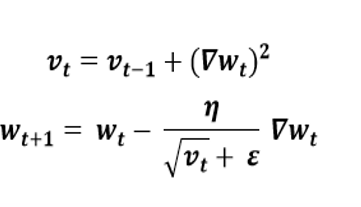

In [78]:
th_op , cost, th0 , th1 , h , vt =Batch_Adagrad_GD(x,y,theta,alpha,itera)

In [79]:
th_op

matrix([[1.19681278, 1.06094475]])

In [80]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

In [81]:
th0

[1e-06,
 0.35876175024709855,
 0.5760836334074784,
 0.7225493924333092,
 0.825691958952716,
 0.9000630340520626,
 0.954565939267385,
 0.9950777485061449,
 1.0256360632056747,
 1.0490738836161062,
 1.067401318980667,
 1.0820531141205698,
 1.0940566166430112,
 1.1041487418007205,
 1.1128585941018734,
 1.120566286568287,
 1.1275449932093684,
 1.13399108437005,
 1.1400457501012613,
 1.1458105271974357,
 1.1513584533755228,
 1.1567420821282255,
 1.161999242690627,
 1.1671571799042377,
 1.1722355298488552,
 1.1772484587419338,
 1.1822062004343545,
 1.1871161616243822,
 1.1919837163420244,
 1.1968127770717445]

In [82]:
cost

[89.34677208171051,
 39.3730652482535,
 19.084089623299345,
 9.611213685619497,
 4.944375538560468,
 2.5884815842054576,
 1.3848258913132967,
 0.7659384828082443,
 0.44647746596190535,
 0.28103463478171403,
 0.1950029336512186,
 0.14996769514434075,
 0.12611356576794103,
 0.11320962614298455,
 0.10597092366776532,
 0.10166670205654459,
 0.0988857447367288,
 0.09689866610154368,
 0.09532843227792781,
 0.09398010561262161,
 0.09275285944222417,
 0.09159450680270005,
 0.09047800003288639,
 0.08938928516967387,
 0.08832102473320566,
 0.087269353450852,
 0.08623220149496477,
 0.08520842786264757,
 0.08419737246468628,
 0.0831986246183131]

In [83]:
vt

[matrix([[  290.999472  , 47863.30197055]]),
 matrix([[  355.56225073, 58376.47001524]]),
 matrix([[  387.52399398, 63447.14692821]]),
 matrix([[  404.05010791, 65979.67395998]]),
 matrix([[  412.82896394, 67263.78535123]]),
 matrix([[  417.59829722, 67919.11581352]]),
 matrix([[  420.25003566, 68254.25288958]]),
 matrix([[  421.764253 , 68425.5510759]]),
 matrix([[  422.65690475, 68512.8887884 ]]),
 matrix([[  423.20343251, 68557.22377544]]),
 matrix([[  423.55301454, 68579.58051451]]),
 matrix([[  423.78777451, 68590.74599514]]),
 matrix([[  423.95378801, 68596.24502095]]),
 matrix([[  424.07747569, 68598.89875472]]),
 matrix([[  424.17435986, 68600.14125281]]),
 matrix([[  424.25379913, 68600.69664569]]),
 matrix([[  424.32158633, 68600.92704721]]),
 matrix([[  424.38139943, 68601.01094397]]),
 matrix([[  424.43562905, 68601.0343945 ]]),
 matrix([[  424.48586148, 68601.03745531]]),
 matrix([[  424.53316805, 68601.03767037]]),
 matrix([[  424.57828294, 68601.04185062]]),
 matrix([[  

Text(0, 0.5, 'Cost Value')

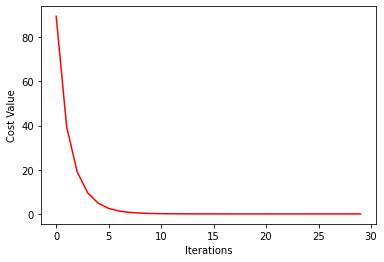

In [84]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

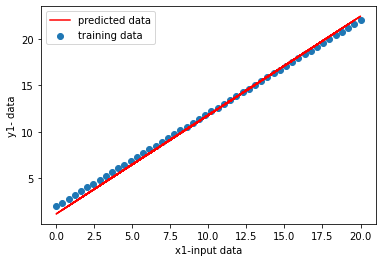

In [85]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

In [86]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

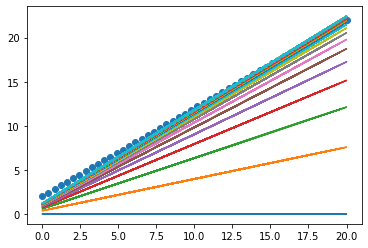

In [87]:
plt.scatter(df.x1,df.y)
for i in  h:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

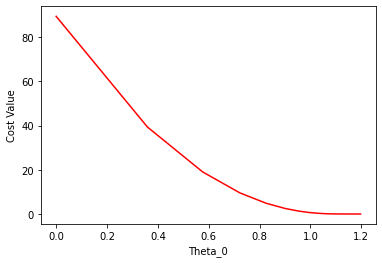

In [88]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

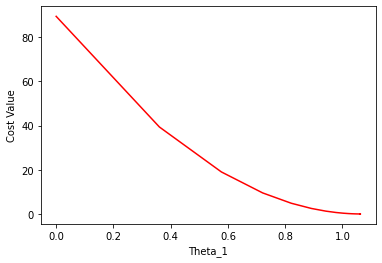

In [89]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [90]:
r2_score(df.y , y_hat)

0.9952038439925913

# RMS

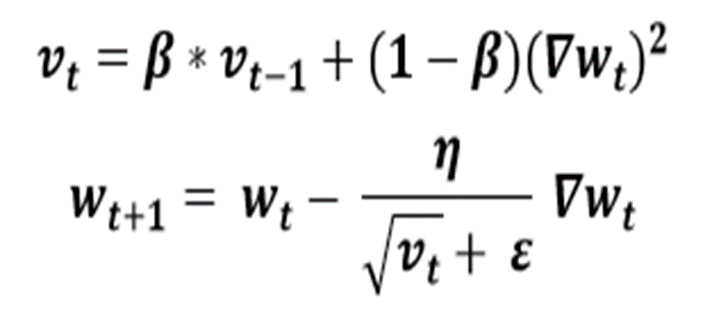

In [91]:
def RMS(x,y,v,theta,gama):
    
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        return v

    v.append (((gama*v[-1]) + ((1-gama)*np.power(gradient(x,y,theta),2))))
    return v[-1]

In [486]:
def Batch_RMS_GD(X,Y,Theta,lr,iteration,gama):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = []                   
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    vt=[]
    eps=0.0000000000001
    for i in range(iteration):
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
     
        cost.append( GDCostFunction(X,Y,Theta) )

        vt.append(RMS(X,Y,v,Theta,gama))
        vt_sqrt=np.sqrt(vt[-1])
        grad=gradient(X,Y,Theta)
        if i > 1:
            if np.abs(cost[i-1] - cost[i]) < 0.001:
                  break
        for j in range(theta_parameters):
        
            temp[:,j] = Theta[:,j] - (( lr* grad[:,j] ) /  ( vt_sqrt[:,j] + eps  ))
            
        Theta=temp
        
    return Theta , cost,tt0,tt1,h,vt

In [487]:
alpha=0.01
itera=1000
gama=0.5

In [488]:
th_op , cost, th0 , th1 , h , vt =Batch_RMS_GD(x,y,theta,alpha,itera,gama)

In [489]:
th_op

matrix([[1.19014709, 1.06580099]])

In [490]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

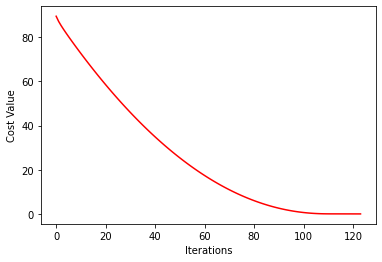

In [491]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

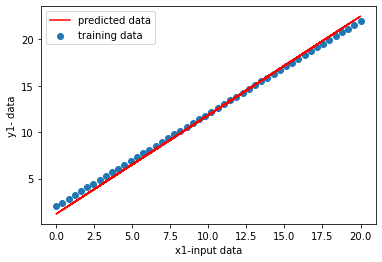

In [492]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')



In [493]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

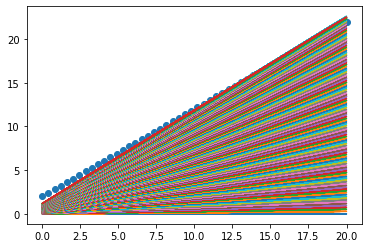

In [494]:
plt.scatter(df.x1,df.y)
for i in  h:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

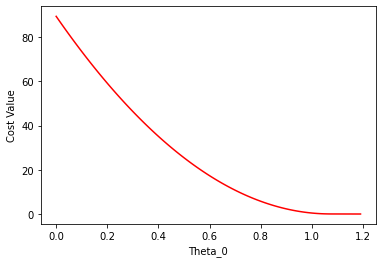

In [495]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

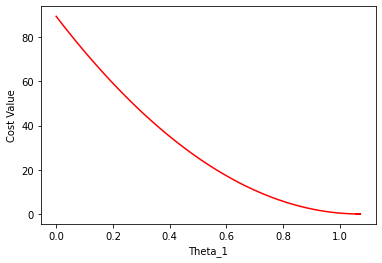

In [496]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [497]:
r2_score(df.y , y_hat)

0.9950056655326254

# Adam

In [92]:
# Read Data
df=pd.read_csv('mm.csv',names=['x1','x2','x3','y'])


# Add part of theta 0 (OR) bias
df.insert(0,'x0',1)

# In Mini-Batch and Stocastic we prefer shuffle data 
# shuffle DataFrame
df = df.sample(frac=1)

# slice dataFrame to features and labels
col = df.shape[1]
x=np.matrix(df.iloc[:, 0:col-1])   # Features
y=np.matrix(df.iloc[:,col-1:col])  # Labels


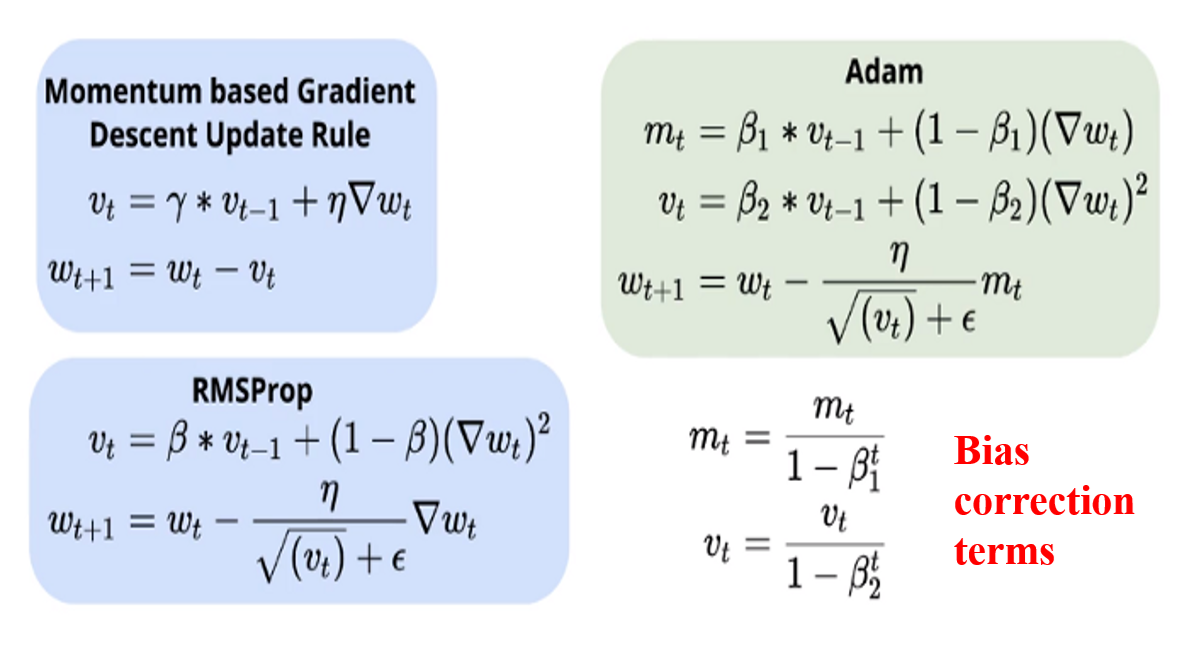

In [94]:
def Adam(x,y,theta,v,m,gama1,gama2):
    if len(m)== 0 & len(v)==0:
        m.append(np.matrix([0,0,0,0]))
        v.append(np.matrix([0,0,0,0]))
        return v,m

    m.append((gama1 * v[-1]) + ((1-gama1 )* gradient(x,y,theta)))
   
    v.append (((gama2*v[-1]) + ((1-gama2)*np.power(gradient(x,y,theta),2))))
    return v[-1],m[-1]
    

In [95]:
alpha=0.001
gama1=0.9
gama2=0.7
itera=1000

In [96]:
v=[]
m=[]

In [97]:
vt,mt=Adam(x,y,theta,v,m,gama1,gama2)

In [98]:
vt[-1]* (1/(1-gama2))

matrix([[0., 0., 0., 0.]])

In [99]:
mt

[matrix([[0, 0, 0, 0]])]

In [100]:
mt[-1]* (1/(1-gama1))

matrix([[0., 0., 0., 0.]])

In [101]:
def Batch_Adam_GD(X,Y,Theta,lr,iteration,gama1,gama2):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = []                   
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    vt=[]
    mt=[]
    eps=0.0000000000001
    for i in range(iteration):
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
     
        cost.append( GDCostFunction(X,Y,Theta) )

        v,m=Adam(X,Y,Theta,vt,mt,gama1,gama2)
        vt.append(v[-1]* (1/(1-(gama2)**(i+1))))
        mt.append(m[-1]* (1/(1-gama1)**(i+1)))
        if i > 1:
            if np.abs(cost[i-1] - cost[i]) < 0.001:
                  break
        for j in range(theta_parameters):
                  
                temp[:,j] = Theta[:,j] - (  (lr * mt[-1][:,j])/ (np.sqrt(vt[-1][:,j])  +eps  ))
        
        Theta=temp
        
    return Theta, cost,tt0,tt1,h

In [102]:
alpha=0.1
gama1=0.0001
gama2=0.7
itera=100

In [105]:
def MBatch_Adam_GD(X,y,Theta,lr,iteration,gama1,gama2,batch_size = 20):  
    m = len(y)
    costs = []                   
    thetas = []
    h=[]
    vt=[]
    mt=[]
    eps=0.01
    for i in range(iteration):
        
        cost = 0
        indices = np.random.permutation(len(y))
        X = X[indices]
        y = y[indices]
        for j in range(0,len(y),batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            v,m=Adam(X_i,y_i,Theta,vt,mt,gama1,gama2)
            vt.append(v[-1]* (1/(1-gama2**(i+1))))
            mt.append(m[-1]* (1/(1-gama1**(i+1))))
            Theta = Theta - (lr * mt[-1])/(np.sqrt(vt[-1])+eps)
        costs.append( ComputeCost(X,y,Theta) )
        thetas.append(Theta[0])
        h.append(X @ Theta.T)
        
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 0.0001:
                break
            if np.linalg.norm(GetGradient(X,y,Theta)) < 0.0001:
                break;
        
    return Theta[0], costs,thetas,h

In [103]:
th_op , cost, th0 , th1 , h  =Batch_Adam_GD(x,y,theta,alpha,itera,gama1,gama2)

ValueError: shapes (25,4) and (2,1) not aligned: 4 (dim 1) != 2 (dim 0)

In [104]:
th_op

matrix([[1.19681278, 1.06094475]])

In [61]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

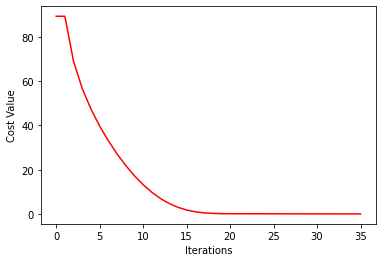

In [62]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

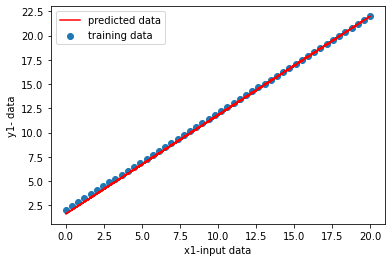

In [63]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')



In [64]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

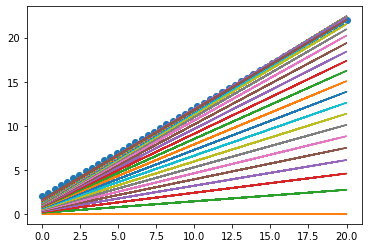

In [65]:
plt.scatter(df.x1,df.y)
for i in  h:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

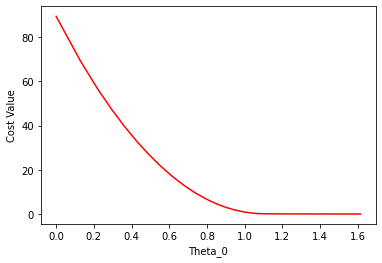

In [66]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

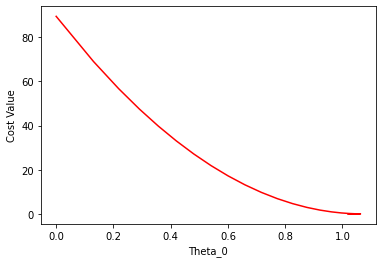

In [67]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

In [485]:
r2_score(df.y , y_hat)

0.9969954804802712